<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/CNN/Convolutional_Neural_Networks_(CNN)_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN) - Object Recognition

# Imports

In [1]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

In [2]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10 # importing the dataset

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

We are using Tensorflow to power Keras

# Get the Dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The dataset is popularly used to train image classification models


In [4]:
# Getting the dataset as a Tuple

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# Constants

In [5]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Exploring the Data

Lets look at the first image in the dataset

In [6]:
x_train_all.shape

(50000, 32, 32, 3)

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train_all[0].shape

(32, 32, 3)

#### Using ipython to display the image

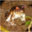

In [9]:
# To use the ipython display to view an image

pic = array_to_img(x_train_all[0])
display(pic)

#### Using Matplotlib to view the image

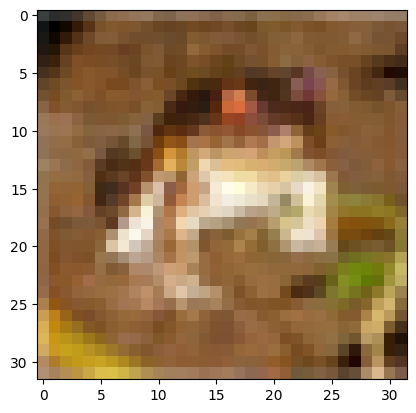

In [10]:
plt.imshow(x_train_all[0])


In [11]:
# To check the label
y_train_all.shape

(50000, 1)

In [13]:
# Note that in the image above the index 1 corresponds to "Automobile"
# we have a 2 dimension numpy array; that is why we also include " [0] "

y_train_all[0][0]

6

In [14]:
# Using the lable names to get the actual names of classes

LABEL_NAMES[y_train_all[0][0]]

'frog'

### The shape of the image
    * 32, 32 is the weight and the height
    * 3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
    
 * x_train_all.shape  >>> (50000, 32, 32, 3)
     * this means we have 50,000 entries | then 32x32  weight and height| 3 colors (RGB)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [17]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

#### * We need to preprocess our data so that it is easier to feed it to our neural network.


### Scalling both x_train and test


In [18]:
x_train_all =x_train_all / 255.0

In [19]:
x_test =  x_test / 255.0

In [20]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Creating categorical encoding for the "y " data

In [21]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_train_all = to_categorical(y_train_all,10)

In [22]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_test = to_categorical(y_test,10)

In [23]:
y_cat_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Creating the Validation dataset

For small data we usually go with:
    * 60% for Training
    * 20% Validation
    * 20% Testing
    
Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [24]:
VALIDATION_SIZE = 10000

In [25]:
# VALIDATION_SIZE = 10,000 as defined above

x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [26]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<b>NEXT:</b>
* We Create two NumPy arrays x_train and y_train that have the shape(40000, 3072) and (40000,1) respectively.
* They will contain the last 40000 values from x_train_all and y_train_all respectively

In [27]:
x_train = x_train_all[VALIDATION_SIZE:]
y_cat_train= y_cat_train_all[VALIDATION_SIZE:]

In [28]:
x_train.shape

(40000, 32, 32, 3)

In [29]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

(attachment:Screenshot%202021-02-15%20at%208.04.47%20pm.png)
 ## NOTE:
 <h4>* <em>FILTERS: </em>
    Typical values for the number of filters can be determined by the data set's complexity. So essentially the larger the images, the more variety and the more classes you're trying to classify then the more filters you should have.</h4>
   <h4> * Most times people typically pick filter based on powers of 2, for example, 32. However, if you have more complex data like road signs etc. you should be starting with a higher filter value</h4>
   <h4>The default STRIDE value is 1 x 1 pixel</h4>

# BUILDING THE MODEL

In [30]:
model = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************
#Since the shape of the data is 32 x 32 x 3 =3072 ...
#We need to deal with this more complex structure by adding yet another convolutional layer

# *************CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

### Adding Early stopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/25
1250/1250 [==============================] - 46s 36ms/step - loss: 1.5392 - accuracy: 0.4428 - val_loss: 1.2879 - val_accuracy: 0.5380
Epoch 2/25
1250/1250 [==============================] - 46s 37ms/step - loss: 1.2012 - accuracy: 0.5764 - val_loss: 1.1273 - val_accuracy: 0.6085
Epoch 3/25
1250/1250 [==============================] - 53s 43ms/step - loss: 1.0482 - accuracy: 0.6335 - val_loss: 1.1271 - val_accuracy: 0.6087
Epoch 4/25
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9322 - accuracy: 0.6725 - val_loss: 1.0536 - val_accuracy: 0.6308
Epoch 5/25
1250/1250 [==============================] - 49s 39ms/step - loss: 0.8303 - accuracy: 0.7111 - val_loss: 0.9790 - val_accuracy: 0.6624
Epoch 6/25
1250/1250 [==============================] - 43s 34ms/step - loss: 0.7468 - accuracy: 0.7384 - val_loss: 0.9936 - val_accuracy: 0.6673
Epoch 7/25
1250/1250 [==============================] - 48s 39ms/step - loss: 0.6602 - accuracy: 0.7695 - val_loss: 1.0162 -

In [35]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.539208,0.442750,1.287940,0.5380
1,1.201229,0.576425,1.127282,0.6085
2,1.048229,0.633500,1.127057,0.6087
3,0.932173,0.672450,1.053641,0.6308
4,0.830286,0.711075,0.979022,0.6624
5,0.746809,0.738450,0.993639,0.6673
6,0.660234,0.769525,1.016216,0.6701


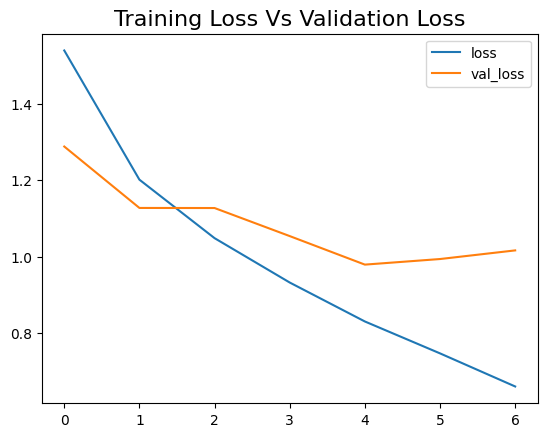

In [38]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

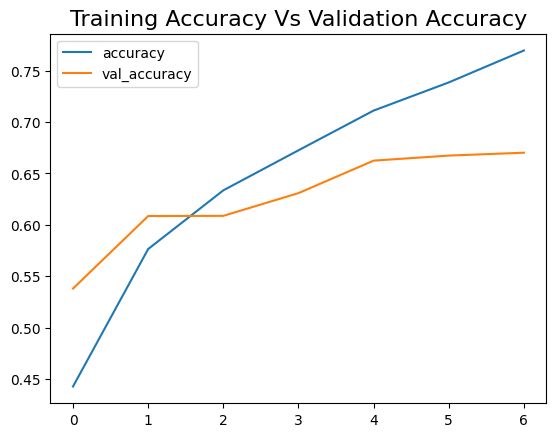

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Validating on Test Data

In [40]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0284 - accuracy: 0.6655


[1.0284247398376465, 0.6654999852180481]

## Classification Report and Confusion Matrix

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#predictions = model.predict_classes(x_test)
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 4s 11ms/step


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.81      0.75      0.78      1000
           2       0.66      0.48      0.55      1000
           3       0.54      0.41      0.46      1000
           4       0.56      0.71      0.62      1000
           5       0.65      0.46      0.54      1000
           6       0.72      0.74      0.73      1000
           7       0.79      0.68      0.73      1000
           8       0.70      0.86      0.77      1000
           9       0.61      0.83      0.70      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



In [44]:
confusion_matrix(y_test,predictions)

array([[735,  18,  18,  15,  22,   2,   5,   8, 121,  56],
       [ 15, 747,   5,   5,   4,   3,   7,   1,  58, 155],
       [ 96,  18, 480,  42, 145,  51,  81,  23,  37,  27],
       [ 43,  19,  52, 411, 122, 115,  92,  26,  42,  78],
       [ 38,   7,  40,  32, 712,  18,  37,  66,  26,  24],
       [ 27,   9,  66, 179,  95, 457,  48,  48,  22,  49],
       [ 24,   8,  36,  37,  77,  12, 740,   8,  18,  40],
       [ 31,  12,  23,  30,  93,  38,  10, 684,   8,  71],
       [ 57,  23,   5,  11,   3,   1,   4,   1, 856,  39],
       [ 32,  62,   6,   6,   6,   6,   4,   6,  39, 833]])

# Predicting on single image

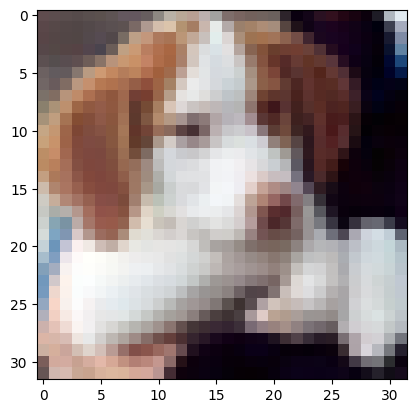

In [63]:
#plt.imshow(x_test[16])
plt.imshow(x_test[16])

In [64]:
my_image = x_test[16]

In [65]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_image.reshape(1,32,32,3))
import numpy as np
predictions = model.predict(my_image.reshape(1,32,32,3))
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 23ms/step


In [66]:
LABEL_NAMES[y_test[16][0]]

'dog'